In [171]:
from keras.datasets import mnist

from keras.utils import to_categorical

# load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# normalize the pixel values to [0, 1]
x_train = X_train.astype('float32') / 255.0
x_test = X_test.astype('float32') / 255.0

# reshape the input data from (28, 28) to (784,)
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

# one-hot encode the target variable
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

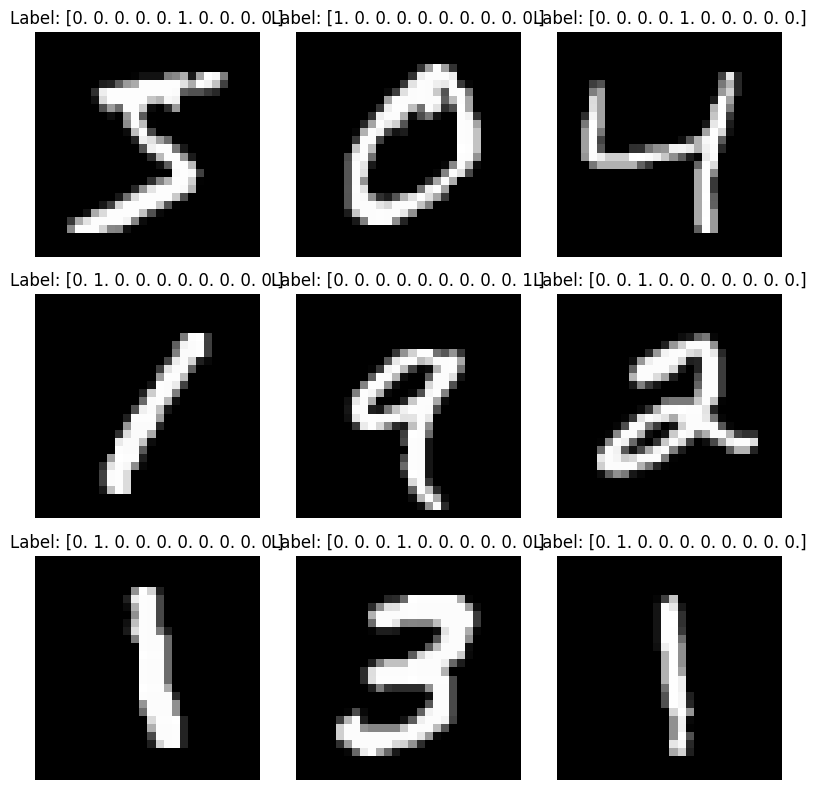

In [172]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [173]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [174]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [175]:
y_train.shape

(48000, 10)

In [177]:
history_sgd = model.fit(x_train, y_train, epochs=10, batch_size=128, )

history_mini_batch_sgd = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

history_batch_sgd = model.fit(x_train, y_train, epochs=10, batch_size=len(x_train), validation_data=(x_val, y_val))


Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.2505 - accuracy: 0.9246
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2296 - accuracy: 0.9315
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2179 - accuracy: 0.9350
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2089 - accuracy: 0.9386
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2014 - accuracy: 0.9409
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1946 - accuracy: 0.9429
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1887 - accuracy: 0.9448
Epoch 8/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1832 - accuracy: 0.9464
Epoch 9/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1781 - accuracy: 0.9477
Epoch 10/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1734 - accuracy: 0.949

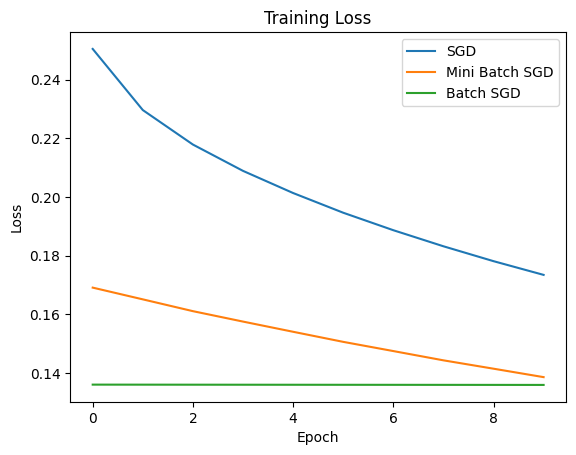

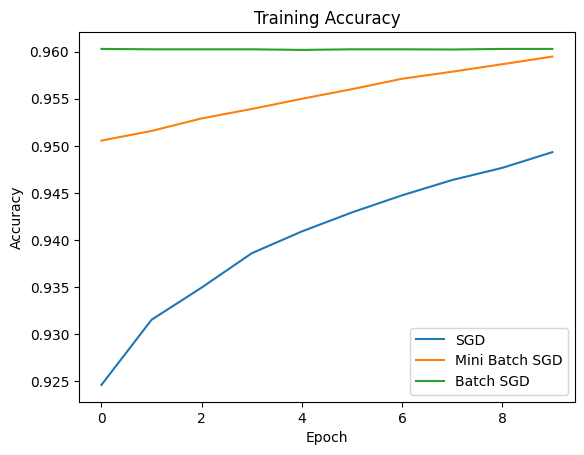

In [178]:
 import matplotlib.pyplot as plt

plt.plot(history_sgd.history['loss'], label='SGD')
plt.plot(history_mini_batch_sgd.history['loss'], label='Mini Batch SGD')
plt.plot(history_batch_sgd.history['loss'], label='Batch SGD')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history_sgd.history['accuracy'], label='SGD')
plt.plot(history_mini_batch_sgd.history['accuracy'], label='Mini Batch SGD')
plt.plot(history_batch_sgd.history['accuracy'], label='Batch SGD')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plt.plot(history_mini_batch_sgd.history['loss'], label='Mini Batch SGD')
# plt.plot(history_mini_batch_sgd_decay.history['loss'], label='Mini Batch SGD with Decay')
# plt.plot(history_sgd_decay_momentum.history['loss'], label='SGD with Decay and Momentum')
# plt.title('Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plt.plot(history_mini_batch_sgd.history['accuracy'], label='Mini Batch SGD')
# plt.plot(history_mini_batch_sgd_decay.history['accuracy'], label='Mini Batch SGD with Decay')
# plt.plot(history_sgd_decay_momentum.history['accuracy'], label='SGD with Decay and Momentum')
# plt.title('Training Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# plt.plot(history_sgd.history['loss'], label='SGD')
# plt.plot(history_adam.history['loss'], label='Adam')
# plt.plot(history_rmsprop.history['loss'], label='RMSProp')
# plt.title('Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plt.plot(history_sgd.history['accuracy'], label='SGD')
# plt.plot(history_adam.history['accuracy'], label='Adam')
# plt.plot(history_rmsprop.history['accuracy'], label='RMSProp')
# plt.title('Training Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [ ]:
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import ModelCheckpoint
# Train the model with Mini batch SGD
sgd = SGD(lr=0.01)
history_sgd = model.fit(x_train, y_train, batch_size=10, epochs=10,
                        validation_data=(x_val, y_val), callbacks=[ModelCheckpoint('best_sgd.h5', save_best_only=True)], verbose=0)

# Train the model with Mini batch SGD with decay
sgd_decay = SGD(lr=0.01, decay=1e-6)
history_sgd_decay = model.fit(x_train, y_train, batch_size=10, epochs=10,
                              validation_data=(x_val, y_val), callbacks=[ModelCheckpoint('best_sgd_decay.h5', save_best_only=True)], verbose=0)

# Train the model with SGD with decay and momentum
sgd_momentum = SGD(lr=0.01, decay=1e-6, momentum=0.9)
history_sgd_momentum = model.fit(x_train, y_train, batch_size=1, epochs=10,
                                 validation_data=(x_val, y_val), callbacks=[ModelCheckpoint('best_sgd_momentum.h5', save_best_only=True)], verbose=0)

# Train the model with Adam optimizer
adam = Adam(lr=0.001)
history_adam = model.fit(x_train, y_train, batch_size=64, epochs=10,
                         validation_data=(x_val, y_val), callbacks=[ModelCheckpoint('best_adam.h5', save_best_only=True)], verbose=0)

# Train the model with RmsProp optimizer
rmsprop = RMSprop(lr=0.001)
history_rmsprop = model.fit(x_train, y_train, batch_size=64, epochs=10,
validation_data=(x_val, y_val), callbacks=[ModelCheckpoint('best_rmsprop.h5', save_best_only=True)], verbose=0)

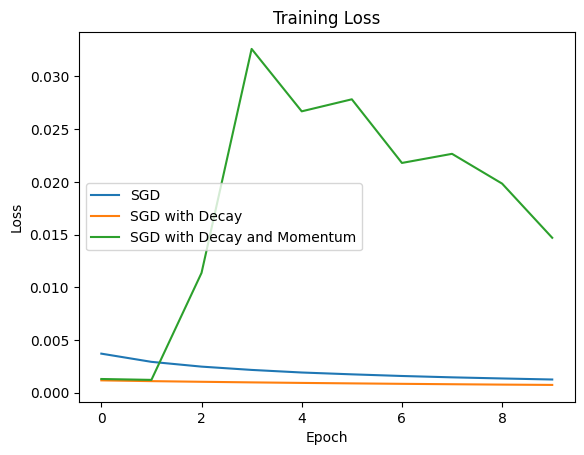

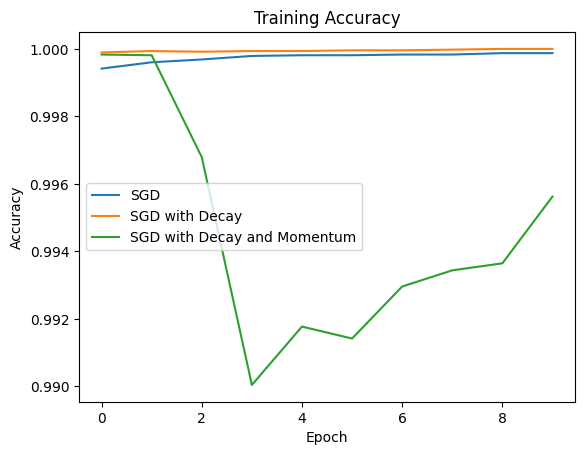

In [9]:
plt.plot(history_sgd.history['loss'], label='SGD')
plt.plot(history_sgd_decay.history['loss'], label='SGD with Decay')
plt.plot(history_sgd_momentum.history['loss'], label='SGD with Decay and Momentum')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_sgd.history['accuracy'], label='SGD')
plt.plot(history_sgd_decay.history['accuracy'], label='SGD with Decay')
plt.plot(history_sgd_momentum.history['accuracy'], label='SGD with Decay and Momentum')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_adam.history['loss'], label='Adam')
plt.plot(history_rmsprop.history['loss'], label='RmsProp')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_adam.history['accuracy'], label='Adam')
plt.plot(history_rmsprop.history['accuracy'], label='RmsProp')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
from keras.optimizers import SGD, Adam, RMSprop

In [9]:
# Train the model with Adam optimizer
from keras.callbacks import ModelCheckpoint
adam = Adam(lr=0.001)
history_adam = model.fit(x_train, y_train, batch_size=64, epochs=10,
                         validation_data=(x_val, y_val), callbacks=[ModelCheckpoint('best_adam.h5', save_best_only=True)], verbose=0)

# Train the model with RmsProp optimizer
rmsprop = RMSprop(lr=0.001)
history_rmsprop = model.fit(x_train, y_train, batch_size=64, epochs=10,
validation_data=(x_val, y_val), callbacks=[ModelCheckpoint('best_rmsprop.h5', save_best_only=True)], verbose=0)

C:\Users\lenovo legion\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


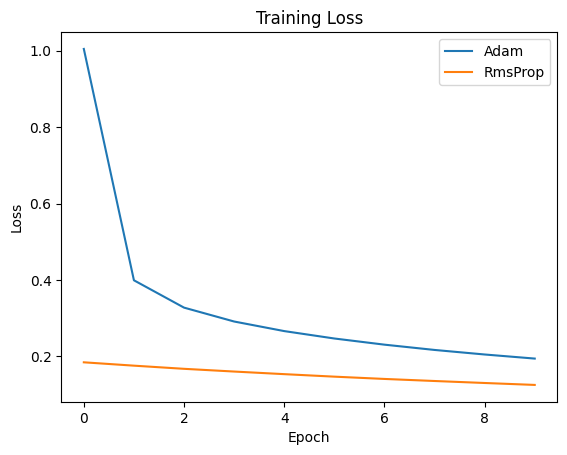

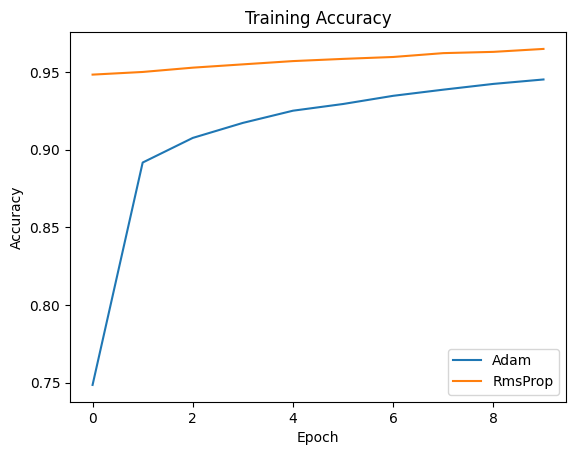

In [11]:
import matplotlib.pyplot as plt
plt.plot(history_adam.history['loss'], label='Adam')
plt.plot(history_rmsprop.history['loss'], label='RmsProp')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_adam.history['accuracy'], label='Adam')
plt.plot(history_rmsprop.history['accuracy'], label='RmsProp')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h1 style="color:blue"> Cifar-10</h1>

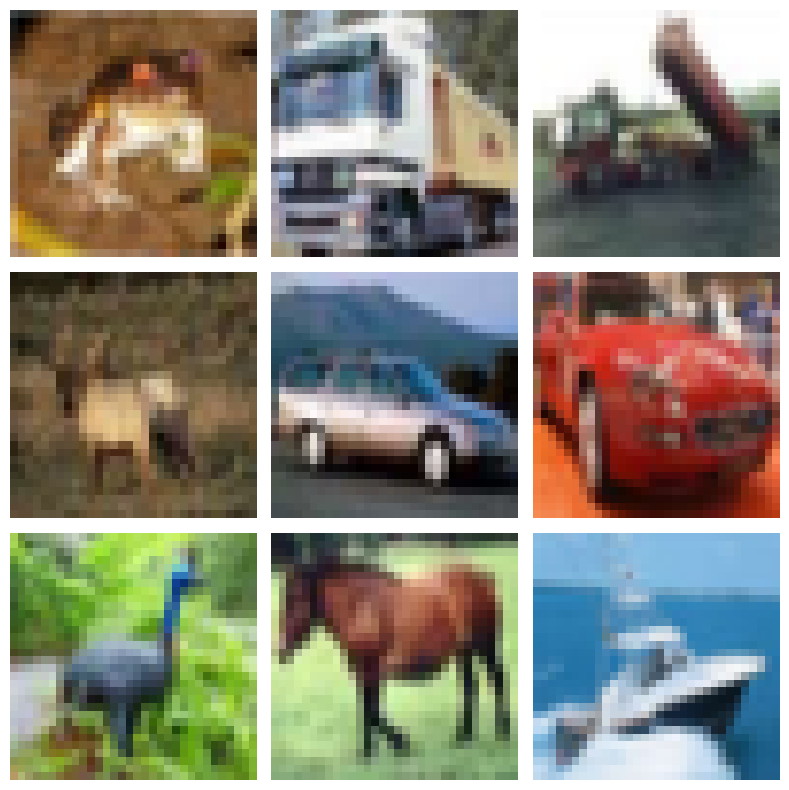

In [86]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [72]:
import tensorflow.keras.datasets.cifar10 as cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print shape of training and test sets
print("Training set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_test.shape)

Training set:  (50000, 32, 32, 3) (50000, 1)
Test set:  (10000, 32, 32, 3) (10000, 1)


In [73]:
X_train=x_train/255
X_test=x_test/255

In [74]:
def x_reshape(x):
    X=x.reshape(((x.shape[0], 32*32*3)))      
    return X
def y_reshape(y):
    Y= keras.utils.to_categorical(y, 10)
    return(Y)      

In [75]:

X_reshaped=x_reshape(X_train)

In [76]:
X_test_reshaped=x_reshape(X_test)
y_test_reshaped=y_reshape(y_test)


In [77]:
y_train_reshaped=y_reshape(y_train)

In [124]:
from keras.models import Sequential 
import keras
from keras.layers import Dense,Dropout, Flatten
import numpy as np
model1 = Sequential()

model1.add(Dense(128, activation='relu', ))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])


In [125]:
model1.fit(X_reshaped, np.array(y_train_reshaped),validation_data=(np.array(X_test_reshaped),np.array( y_test_reshaped)), epochs=50, batch_size=128, )

Epoch 1/50
391/391 [==============================] - 20s 47ms/step - loss: 2.0147 - accuracy: 0.2782 - val_loss: 1.9190 - val_accuracy: 0.2925
Epoch 2/50
391/391 [==============================] - 6s 14ms/step - loss: 1.8473 - accuracy: 0.3430 - val_loss: 1.8034 - val_accuracy: 0.3563
Epoch 3/50
391/391 [==============================] - 6s 14ms/step - loss: 1.7821 - accuracy: 0.3676 - val_loss: 1.7856 - val_accuracy: 0.3513
Epoch 4/50
391/391 [==============================] - 5s 14ms/step - loss: 1.7345 - accuracy: 0.3878 - val_loss: 1.7122 - val_accuracy: 0.4005
Epoch 5/50
391/391 [==============================] - 5s 14ms/step - loss: 1.6962 - accuracy: 0.4005 - val_loss: 1.7129 - val_accuracy: 0.3958
Epoch 6/50
391/391 [==============================] - 5s 13ms/step - loss: 1.6655 - accuracy: 0.4098 - val_loss: 1.6462 - val_accuracy: 0.4195
Epoch 7/50
391/391 [==============================] - 5s 14ms/step - loss: 1.6389 - accuracy: 0.4208 - val_loss: 1.6325 - val_accuracy: 0.421

In [79]:
a=model.predict(X_test_reshaped)

313/313 [==============================] - 1s 3ms/step


In [80]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test_reshaped,a)

0.062740654

In [81]:
b=[i.tolist().index(max(i)) for i in a]

In [10]:
model.save('Cifar-10_NN.h5')

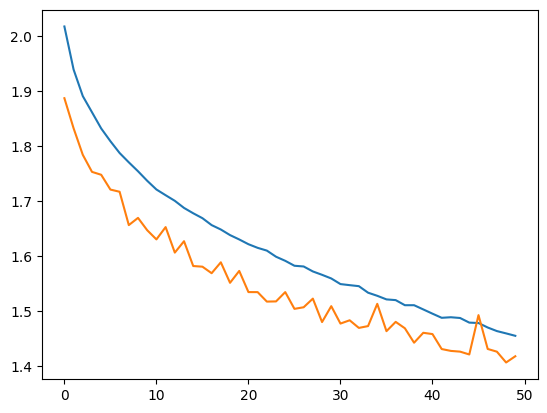

In [198]:
plt.plot(history["loss"])
plt.plot(history["val_loss"])




##  Using L2_regularization 

In [93]:
from keras import regularizers
model_with_l2 = Sequential()
model_with_l2.add(Dense(128, activation='relu', ))
model_with_l2.add(Dense(64, activation='relu'))
model_with_l2.add(Dense(10, activation='softmax',kernel_regularizer=regularizers.l2()))
model_with_l2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

In [94]:
model_with_l2.fit(X_reshaped, np.array(y_train_reshaped),validation_data=(np.array(X_test_reshaped),np.array( y_test_reshaped)), epochs=50, batch_size=128, )

Epoch 1/50
391/391 [==============================] - 4s 9ms/step - loss: 2.2115 - accuracy: 0.2631 - val_loss: 2.0787 - val_accuracy: 0.3227
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 2.0242 - accuracy: 0.3439 - val_loss: 1.9693 - val_accuracy: 0.3636
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 1.9461 - accuracy: 0.3666 - val_loss: 1.9094 - val_accuracy: 0.3838
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 1.8913 - accuracy: 0.3822 - val_loss: 1.8639 - val_accuracy: 0.3889
Epoch 5/50
391/391 [==============================] - 4s 9ms/step - loss: 1.8495 - accuracy: 0.3934 - val_loss: 1.8352 - val_accuracy: 0.3983
Epoch 6/50
391/391 [==============================] - 3s 9ms/step - loss: 1.8131 - accuracy: 0.4024 - val_loss: 1.7978 - val_accuracy: 0.4048
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 1.7825 - accuracy: 0.4106 - val_loss: 1.8035 - val_accuracy: 0.3893
Epoch 

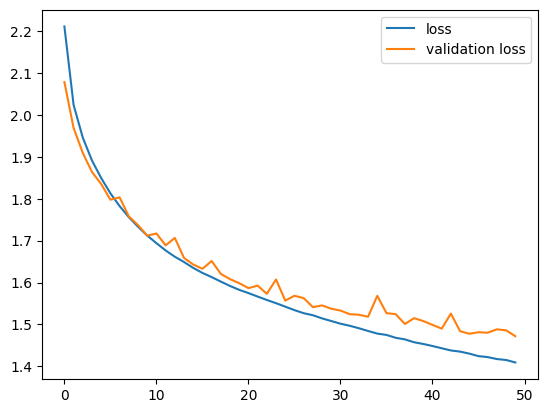

In [182]:
history=model_with_l2.history.history
history
plt.plot(history['loss'],label="loss")
plt.plot(history['val_loss'],label="validation loss")
plt.legend()
plt.show()


In [53]:
model_with_l2.save('Cifar-10_l2_regularization.h5')

## Drop out

In [144]:
from keras import regularizers
def dropout_fn(drop_out_rate):    
    model_with_dropout = keras.Sequential([
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dropout(drop_out_rate),
      keras.layers.Dense(10,activation='softmax')
    ])  
    return model_with_dropout


In [153]:
from keras import regularizers
model_with_dropout = keras.Sequential([
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10,activation='softmax')
])
model_with_dropout.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
model_with_dropout.fit(X_reshaped, np.array(y_train_reshaped),validation_data=(np.array(X_test_reshaped),np.array( y_test_reshaped)), epochs=50, batch_size=128, )

In [163]:
from keras import regularizers
model_with_dropout1 = keras.Sequential([
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(10,activation='softmax')
])
model_with_dropout1.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
model_with_dropout1.fit(X_reshaped, np.array(y_train_reshaped),validation_data=(np.array(X_test_reshaped),np.array( y_test_reshaped)), epochs=50, batch_size=128, )

Epoch 1/50
391/391 [==============================] - 8s 19ms/step - loss: 2.1099 - accuracy: 0.2284 - val_loss: 1.9448 - val_accuracy: 0.3333
Epoch 2/50
391/391 [==============================] - 6s 17ms/step - loss: 1.9453 - accuracy: 0.3028 - val_loss: 1.8477 - val_accuracy: 0.3543
Epoch 3/50
391/391 [==============================] - 6s 16ms/step - loss: 1.8768 - accuracy: 0.3303 - val_loss: 1.7875 - val_accuracy: 0.3728
Epoch 4/50
391/391 [==============================] - 6s 15ms/step - loss: 1.8323 - accuracy: 0.3463 - val_loss: 1.7420 - val_accuracy: 0.3887
Epoch 5/50
391/391 [==============================] - 6s 16ms/step - loss: 1.7972 - accuracy: 0.3633 - val_loss: 1.7308 - val_accuracy: 0.3962
Epoch 6/50
391/391 [==============================] - 6s 15ms/step - loss: 1.7741 - accuracy: 0.3704 - val_loss: 1.6974 - val_accuracy: 0.4064
Epoch 7/50
391/391 [==============================] - 6s 15ms/step - loss: 1.7460 - accuracy: 0.3800 - val_loss: 1.6983 - val_accuracy: 0.4032

In [164]:
from keras import regularizers
model_with_dropout2 = keras.Sequential([
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10,activation='softmax')
])
model_with_dropout2.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
model_with_dropout2.fit(X_reshaped, np.array(y_train_reshaped),validation_data=(np.array(X_test_reshaped),np.array( y_test_reshaped)), epochs=50, batch_size=128, )

Epoch 1/50
391/391 [==============================] - 7s 16ms/step - loss: 2.0668 - accuracy: 0.2462 - val_loss: 1.9296 - val_accuracy: 0.3207
Epoch 2/50
391/391 [==============================] - 6s 16ms/step - loss: 1.9150 - accuracy: 0.3156 - val_loss: 1.8338 - val_accuracy: 0.3589
Epoch 3/50
391/391 [==============================] - 6s 16ms/step - loss: 1.8499 - accuracy: 0.3440 - val_loss: 1.8001 - val_accuracy: 0.3703
Epoch 4/50
391/391 [==============================] - 6s 15ms/step - loss: 1.8071 - accuracy: 0.3576 - val_loss: 1.7411 - val_accuracy: 0.3947
Epoch 5/50
391/391 [==============================] - 6s 15ms/step - loss: 1.7711 - accuracy: 0.3706 - val_loss: 1.7115 - val_accuracy: 0.4027
Epoch 6/50
391/391 [==============================] - 7s 17ms/step - loss: 1.7427 - accuracy: 0.3816 - val_loss: 1.6754 - val_accuracy: 0.4116
Epoch 7/50
391/391 [==============================] - 6s 15ms/step - loss: 1.7181 - accuracy: 0.3950 - val_loss: 1.7010 - val_accuracy: 0.4007

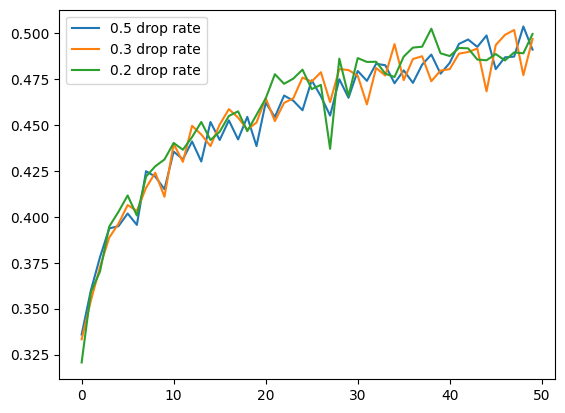

In [184]:
history=model_with_dropout.history.history
history0=model_with_dropout1.history.history
history1=model_with_dropout2.history.history
plt.plot(history['val_accuracy'],label="0.5 drop rate")
plt.plot(history0['val_accuracy'],label="0.3 drop rate")
plt.plot(history1['val_accuracy'],label="0.2 drop rate")
plt.legend()
plt.show()

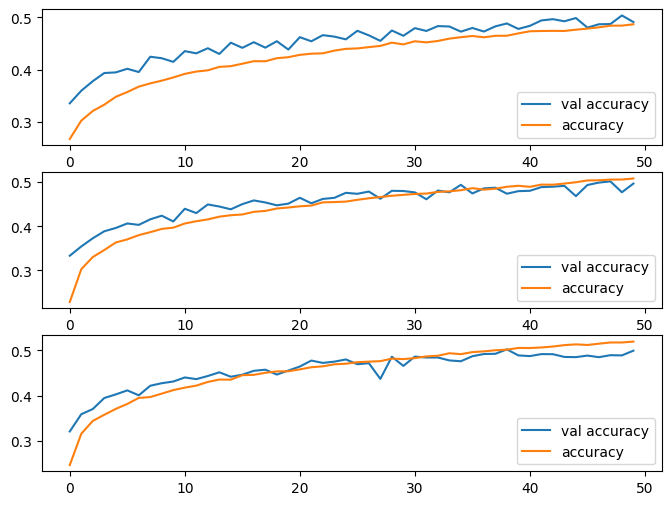

In [186]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))
ax1.plot(history['val_accuracy'],label="val accuracy")
ax1.plot(history['accuracy'],label="accuracy")
ax1.legend()
ax2.plot(history0['val_accuracy'],label="val accuracy")
ax2.plot(history0['accuracy'],label="accuracy")
ax2.legend()
ax3.plot(history1['val_accuracy'],label="val accuracy")
ax3.plot(history1['accuracy'],label="accuracy")
ax3.legend()


## using Batch normalization 

In [29]:
model_with_batchNormalization = keras.Sequential([
  keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(64, activation='relu'),  
  keras.layers.Dense(10,activation='softmax')
])
model_with_batchNormalization.compile(loss='categorical_crossentropy',optimizer= keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

In [100]:
model_with_batchNormalization.fit(X_reshaped, np.array(y_train_reshaped),validation_data=(np.array(X_test_reshaped),np.array( y_test_reshaped)), epochs=50, batch_size=128, )

Epoch 1/50
391/391 [==============================] - 5s 10ms/step - loss: 1.8991 - accuracy: 0.3325 - val_loss: 1.8239 - val_accuracy: 0.3551
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 1.6835 - accuracy: 0.4104 - val_loss: 1.7018 - val_accuracy: 0.3940
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 1.6096 - accuracy: 0.4366 - val_loss: 1.6583 - val_accuracy: 0.4179
Epoch 4/50
391/391 [==============================] - 3s 9ms/step - loss: 1.5568 - accuracy: 0.4532 - val_loss: 1.6537 - val_accuracy: 0.4077
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 1.5154 - accuracy: 0.4687 - val_loss: 1.6511 - val_accuracy: 0.4207
Epoch 6/50
391/391 [==============================] - 3s 9ms/step - loss: 1.4828 - accuracy: 0.4784 - val_loss: 1.6604 - val_accuracy: 0.4224
Epoch 7/50
391/391 [==============================] - 3s 9ms/step - loss: 1.4549 - accuracy: 0.4895 - val_loss: 1.5305 - val_accuracy: 0.4524
Epoch

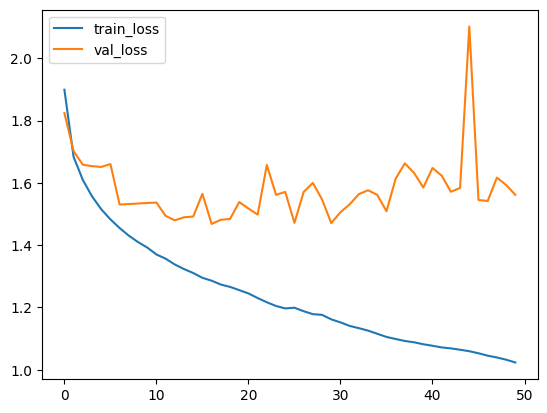

In [200]:
plt.plot(model_with_batchNormalization.history.history['loss'],label="train_loss")
plt.plot(model_with_batchNormalization.history.history['val_loss'],label="val_loss")
plt.legend()
plt.show()


## Early stopping

In [167]:
from keras.callbacks import EarlyStopping

# Create the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


model_with_early_stopping=model1.fit(X_reshaped, np.array(y_train_reshaped),validation_data=(np.array(X_test_reshaped),np.array( y_test_reshaped)), epochs=50, batch_size=128, )

Epoch 1/50
391/391 [==============================] - 8s 21ms/step - loss: 1.2425 - accuracy: 0.5624 - val_loss: 1.3933 - val_accuracy: 0.5091
Epoch 2/50
391/391 [==============================] - 6s 15ms/step - loss: 1.2379 - accuracy: 0.5647 - val_loss: 1.4561 - val_accuracy: 0.4970
Epoch 3/50
391/391 [==============================] - 6s 14ms/step - loss: 1.2330 - accuracy: 0.5676 - val_loss: 1.4077 - val_accuracy: 0.5057
Epoch 4/50
391/391 [==============================] - 6s 15ms/step - loss: 1.2299 - accuracy: 0.5680 - val_loss: 1.3751 - val_accuracy: 0.5129
Epoch 5/50
391/391 [==============================] - 6s 16ms/step - loss: 1.2258 - accuracy: 0.5686 - val_loss: 1.3995 - val_accuracy: 0.5019
Epoch 6/50
391/391 [==============================] - 6s 15ms/step - loss: 1.2167 - accuracy: 0.5734 - val_loss: 1.4446 - val_accuracy: 0.4953
Epoch 7/50
391/391 [==============================] - 6s 14ms/step - loss: 1.2123 - accuracy: 0.5736 - val_loss: 1.3836 - val_accuracy: 0.5100

## Random search

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [114]:
def model(learning_rate,dropout_rate,batch_size):
    model = keras.Sequential([
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dropout(dropout_rate),
      keras.layers.Dense(10,activation='softmax')
    ])
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [116]:
param_dist = {'learning_rate': [0.0001,0.001,0.005,0.01,0.1],
              'dropout_rate':[0.1,0.2,0.3,0.4, 0.5],
              'batch_size': [16, 32, 64, 128],            
             }
# Create a Keras classifier for use with scikit-learn
random_search_model = KerasClassifier(build_fn=model,batch_size=128,verbose=0)

C:\Users\jtm\AppData\Local\Temp\ipykernel_7044\4275671919.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  random_search_model = KerasClassifier(build_fn=model,batch_size=128,verbose=0)


In [117]:
random_search1 = RandomizedSearchCV(random_search_model, param_distributions=param_dist, n_iter=10, cv=2)
random_search1.fit(X_reshaped, np.array(y_train_reshaped),epochs=10,validation_data=(np.array(X_test_reshaped),np.array( y_test_reshaped)))
# Print the best hyperparameters and accuracy
print("Best hyperparameters: ", random_search1.best_params_)

Best hyperparameters:  {'learning_rate': 0.005, 'dropout_rate': 0.3, 'batch_size': 16}


In [118]:
final_model = keras.Sequential([                                                                                                                                                                
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(64, activation='relu'),     
      keras.layers.Dropout(random_search1.best_params_['dropout_rate']),
      keras.layers.Dense(10,activation='softmax')
    ])
optimizer = keras.optimizers.SGD(learning_rate=random_search1.best_params_['learning_rate'])
final_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [120]:
final_model.fit(X_reshaped, np.array(y_train_reshaped),validation_data=(np.array(X_test_reshaped),np.array( y_test_reshaped)), epochs=50, batch_size=random_search1.best_params_['batch_size'], )

Epoch 1/50
3125/3125 [==============================] - 19s 6ms/step - loss: 1.1973 - accuracy: 0.5710 - val_loss: 1.3414 - val_accuracy: 0.5245
Epoch 2/50
3125/3125 [==============================] - 19s 6ms/step - loss: 1.1882 - accuracy: 0.5744 - val_loss: 1.3488 - val_accuracy: 0.5254
Epoch 3/50
3125/3125 [==============================] - 18s 6ms/step - loss: 1.1829 - accuracy: 0.5751 - val_loss: 1.3637 - val_accuracy: 0.5192
Epoch 4/50
3125/3125 [==============================] - 17s 6ms/step - loss: 1.1830 - accuracy: 0.5750 - val_loss: 1.3934 - val_accuracy: 0.5147
Epoch 5/50
3125/3125 [==============================] - 17s 6ms/step - loss: 1.1783 - accuracy: 0.5750 - val_loss: 1.3340 - val_accuracy: 0.5306
Epoch 6/50
3125/3125 [==============================] - 17s 5ms/step - loss: 1.1732 - accuracy: 0.5808 - val_loss: 1.3362 - val_accuracy: 0.5302
Epoch 7/50
3125/3125 [==============================] - 16s 5ms/step - loss: 1.1672 - accuracy: 0.5801 - val_loss: 1.3791 - val_ac

## Comparing all models

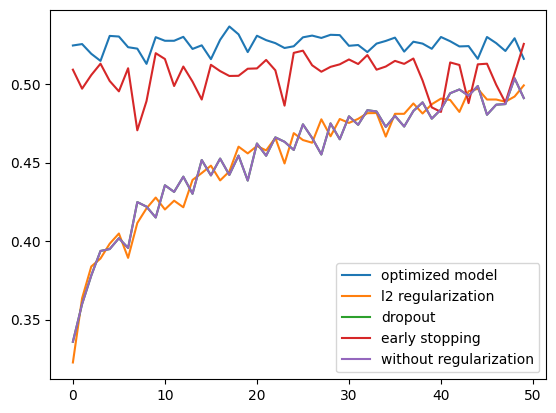

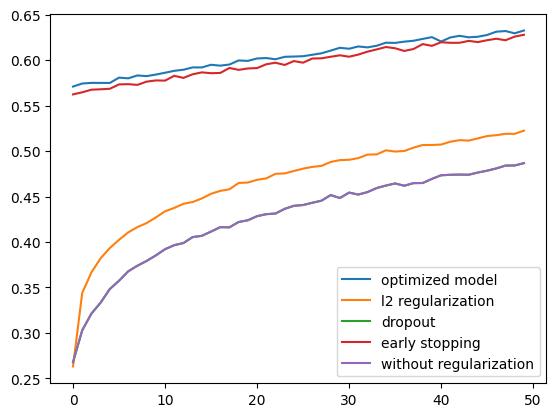

In [195]:
plt.plot(final_model.history.history['val_accuracy'],label="optimized model")
plt.plot(model_with_l2.history.history['val_accuracy'],label="l2 regularization")
plt.plot(model_with_dropout.history.history['val_accuracy'],label="dropout")
plt.plot(model_with_early_stopping.history['val_accuracy'],label="early stopping")
plt.plot(history['val_accuracy'],label="without regularization")

plt.legend()
plt.show()
plt.plot(final_model.history.history['accuracy'],label="optimized model")
plt.plot(model_with_l2.history.history['accuracy'],label="l2 regularization")
plt.plot(model_with_dropout.history.history['accuracy'],label="dropout")
plt.plot(model_with_early_stopping.history['accuracy'],label="early stopping")
plt.plot(history['accuracy'],label="without regularization")
plt.legend()
plt.show()

<h3>
In summary, L2 regularization, dropout regularization, and batch normalization are three commonly used regularization techniques. L2 regularization reduces the magnitude of the weights, dropout regularization forces the network to learn more robust features, and batch normalization reduces the internal covariate shift. These techniques are used in different scenarios to prevent overfitting and improve the performance of the model.</h3>

<h3>in term of execution time using regularization methods is a bit slower espicially BatchNormalization </h3>